In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from tqdm import tqdm

prices = ['^GSPC', 'BND', 'GD=F', 'VNQ', 'MMF']
asset_names = ['STOCKS', 'BONDS', 'COMMODITIES', 'REAL-ESTATE' , 'MMF']

# Gather prices

In [3]:
df = pd.DataFrame()
for i, ticker in enumerate(prices):
    if ticker != 'MMF':
        data = yf.download(ticker, start='2000-01-01')
        df[asset_names[i]] = data['Adj Close']

df = df.dropna()
df.dropna(inplace=True)
print(f'We have data from {df.index.min()}')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

We have data from 2007-04-10 00:00:00


In [4]:
# Create a date range from 2007 to today
date_range = pd.date_range(start='2007-01-01', end=pd.Timestamp.today(), freq='D')
date_df = pd.DataFrame(date_range, columns=['Date'])

# Rates DataFrame with Year and Annual Return (%)
rates_data = {
    "Year": [2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
             2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024],
    "Annual Return (%)": [4.5, 2.0, 0.5, 0.1, 0.1, 0.1, 0.1, 0.1,
                          0.2, 0.3, 0.8, 1.8, 2.0, 0.5, 0.0, 1.6, 5.3, 5.0]
}
rates_df = pd.DataFrame(rates_data)
# Calculate daily compounded rate for each year
rates_df['Daily Rate'] = (1 + rates_df['Annual Return (%)'] / 100) ** (1/365) - 1
# Map daily rates to dates
date_df['Year'] = date_df['Date'].dt.year
date_df = date_df.merge(rates_df[['Year', 'Daily Rate']], on='Year', how='left')

# Calculate the equity curve starting from an initial value of $100
equity_curve = [100]  # Start with an initial value of $100
for i in range(1, len(date_df)):
    previous_equity = equity_curve[-1]
    daily_rate = date_df.iloc[i]['Daily Rate']
    equity_curve.append(previous_equity * (1 + daily_rate))

date_df['Equity Curve'] = equity_curve
df['MMF'] = date_df.set_index('Date')['Equity Curve']
df


,STOCKS,BONDS,COMMODITIES,REAL-ESTATE,MMF
Date,,,,,
2007-04-10,1448.390015,43.704361,462.399994,38.551586,101.201038
2007-04-11,1438.869995,43.588169,463.299988,37.977272,101.213243
2007-04-12,1447.800049,43.582397,468.200012,37.718826,101.225449
2007-04-13,1452.849976,43.512684,469.149994,38.144768,101.237657
2007-04-16,1468.329956,43.553318,464.799988,38.192642,101.274290
...,...,...,...,...,...
2024-12-02,6047.149902,73.419998,534.099976,96.730003,127.369042
2024-12-03,6049.879883,73.250000,539.750000,96.239998,127.386069
2024-12-04,6086.490234,73.500000,536.000000,95.980003,127.403098


In [5]:
# calculate #pct_cjhanges
for asset in asset_names:
    df[f'{asset}_pctChange'] = df[asset].pct_change(fill_method=None).fillna(0)
df

,STOCKS,BONDS,COMMODITIES,REAL-ESTATE,MMF,STOCKS_pctChange,BONDS_pctChange,COMMODITIES_pctChange,REAL-ESTATE_pctChange,MMF_pctChange
Date,,,,,,,,,,
2007-04-10,1448.390015,43.704361,462.399994,38.551586,101.201038,0.000000,0.000000,0.000000,0.000000,0.000000
2007-04-11,1438.869995,43.588169,463.299988,37.977272,101.213243,-0.006573,-0.002659,0.001946,-0.014897,0.000121
2007-04-12,1447.800049,43.582397,468.200012,37.718826,101.225449,0.006206,-0.000132,0.010576,-0.006805,0.000121
2007-04-13,1452.849976,43.512684,469.149994,38.144768,101.237657,0.003488,-0.001600,0.002029,0.011293,0.000121
2007-04-16,1468.329956,43.553318,464.799988,38.192642,101.274290,0.010655,0.000934,-0.009272,0.001255,0.000362
...,...,...,...,...,...,...,...,...,...,...
2024-12-02,6047.149902,73.419998,534.099976,96.730003,127.369042,0.002448,0.000586,-0.006233,-0.014568,0.000401
2024-12-03,6049.879883,73.250000,539.750000,96.239998,127.386069,0.000451,-0.002315,0.010579,-0.005066,0.000134
2024-12-04,6086.490234,73.500000,536.000000,95.980003,127.403098,0.006051,0.003413,-0.006948,-0.002702,0.000134


# Define useful functions

In [6]:
def calculate_max_drawdown(equity_curve):
    if not isinstance(equity_curve, pd.Series):
        raise ValueError("Equity curve should be a pandas Series")

    cumulative_max = equity_curve.cummax()
    drawdown = (equity_curve - cumulative_max) / cumulative_max
    max_drawdown = drawdown.min() * 100  # Convert to percentage
    return max_drawdown

def calculate_sharpe_ratio(equity_curve, risk_free_rate=0.01):
    if not isinstance(equity_curve, pd.Series):
        raise ValueError("Equity curve should be a pandas Series")

    # Calculate daily returns
    daily_returns = equity_curve.pct_change().dropna()

    # Calculate excess returns over risk-free rate
    excess_returns = daily_returns - (risk_free_rate / 252)

    # Calculate annualized Sharpe Ratio
    sharpe_ratio = np.mean(excess_returns) / np.std(excess_returns) * np.sqrt(252)

    return sharpe_ratio

def calculate_volatility(equity_curve):
    if not isinstance(equity_curve, pd.Series):
        raise ValueError("Input should be a pandas Series")

    returns = equity_curve.pct_change().dropna()
    volatility = returns.std() * np.sqrt(252)  # Annualize the volatility
    return volatility


In [7]:
# Generate combinations with the sum of 100
combinations = [(a, b, c, d, e) for a in range(0, 101, 5)
                for b in range(0, 101, 5)
                for c in range(0, 101, 5)
                for d in range(0, 101, 5)
                for e in range(0, 101, 5) if a + b + c + d + e == 100 and e < 100]

print(f'There are {len(combinations)} combinations')

results = []
# to keed the dfs with equity curves calculated for each combination
results_dfs = {}

for combination in tqdm(combinations):

    df_copy = df.copy()
    df_copy['combined_pctChange'] = 0
    df_copy['combined_pctChange_exc_cash'] = 0

    for i, asset in enumerate(asset_names):
        df_copy[f'{asset}_weight'] = combination[i]/100
        df_copy[f'{asset}_weighted_pctChange'] = df_copy[f'{asset}_weight'] * df_copy[f'{asset}_pctChange']
        df_copy['combined_pctChange'] = df_copy['combined_pctChange'] + df_copy[f'{asset}_weighted_pctChange']
    df_copy['equity_curve'] = (1 + df_copy['combined_pctChange']).cumprod() * 100

    # will also create an equity curve without the cash
    base_total_weight = sum(combination) - combination[4]
    for i, asset in enumerate(asset_names):
        if asset != 'MMF':
            df_copy[f'{asset}_weight_exc_cash'] = combination[i]/base_total_weight
            df_copy[f'{asset}_weighted_pctChange_exc_cash'] = df_copy[f'{asset}_weight_exc_cash'] * df_copy[f'{asset}_pctChange']
            df_copy['combined_pctChange_exc_cash'] = df_copy['combined_pctChange_exc_cash'] + df_copy[f'{asset}_weighted_pctChange_exc_cash']
    df_copy['equity_curve_exc_cash'] = (1 + df_copy['combined_pctChange_exc_cash']).cumprod() * 100


    final_equity_return = (df_copy['equity_curve'].iloc[-1] - 100) / 100 * 100  # Convert final equity return to percentage
    max_drawdown = calculate_max_drawdown(df_copy['equity_curve_exc_cash'])
    sharpe_ratio = calculate_sharpe_ratio(df_copy['equity_curve_exc_cash'])
    volatility = calculate_volatility(df_copy['equity_curve_exc_cash'])

    combination_tag = '_'.join(map(str,combination))

    results_dfs[combination_tag] = df_copy

    results.append((*combination, final_equity_return, max_drawdown, sharpe_ratio, volatility))

results = pd.DataFrame(results, columns=asset_names + ['final_equity_return', 'max_drawdown', 'sharpe_ratio', 'volatility'])
results

There are 10625 combinations


100%|██████████| 10625/10625 [03:19<00:00, 53.18it/s]


,STOCKS,BONDS,COMMODITIES,REAL-ESTATE,MMF,final_equity_return,max_drawdown,sharpe_ratio,volatility
0,0,0,0,5,95,35.476457,-71.253941,0.289179,0.305682
1,0,0,0,10,90,45.153814,-71.253941,0.289179,0.305682
2,0,0,0,15,85,54.883431,-71.253941,0.289179,0.305682
3,0,0,0,20,80,64.586093,-71.253941,0.289179,0.305682
4,0,0,0,25,75,74.177707,-71.253941,0.289179,0.305682
...,...,...,...,...,...,...,...,...,...
10620,95,0,0,0,5,302.648416,-56.775388,0.457244,0.200493
10621,95,0,0,5,0,316.300353,-57.243240,0.451953,0.202477
10622,95,0,5,0,0,304.560542,-55.660188,0.453132,0.195154
10623,95,5,0,0,0,309.169555,-54.516616,0.462931,0.190403


In [8]:
# List of columns to normalize
columns_to_normalize = ['final_equity_return', 'max_drawdown', 'sharpe_ratio', 'volatility']

def z_score_normalize(data):
    return (data - data.mean()) / data.std()

# Normalize only the selected columns and create new columns with _norm suffix
for column in columns_to_normalize:
    results[column + '_norm'] = z_score_normalize(results[column])

results

,STOCKS,BONDS,COMMODITIES,REAL-ESTATE,MMF,final_equity_return,max_drawdown,sharpe_ratio,volatility,final_equity_return_norm,max_drawdown_norm,sharpe_ratio_norm,volatility_norm
0,0,0,0,5,95,35.476457,-71.253941,0.289179,0.305682,-1.909432,-2.017509,-0.833441,2.941183
1,0,0,0,10,90,45.153814,-71.253941,0.289179,0.305682,-1.718729,-2.017509,-0.833441,2.941183
2,0,0,0,15,85,54.883431,-71.253941,0.289179,0.305682,-1.526995,-2.017509,-0.833441,2.941183
3,0,0,0,20,80,64.586093,-71.253941,0.289179,0.305682,-1.335793,-2.017509,-0.833441,2.941183
4,0,0,0,25,75,74.177707,-71.253941,0.289179,0.305682,-1.146779,-2.017509,-0.833441,2.941183
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10620,95,0,0,0,5,302.648416,-56.775388,0.457244,0.200493,3.355501,-0.821498,1.056374,0.772319
10621,95,0,0,5,0,316.300353,-57.243240,0.451953,0.202477,3.624528,-0.860145,0.996881,0.813238
10622,95,0,5,0,0,304.560542,-55.660188,0.453132,0.195154,3.393181,-0.729376,1.010144,0.662240
10623,95,5,0,0,0,309.169555,-54.516616,0.462931,0.190403,3.484007,-0.634911,1.120330,0.564270


In [9]:
weights_growth = {
    'final_equity_return': 0.55,
    'max_drawdown': 0.15,
    'sharpe_ratio': 0.2,
    'volatility': 0.1
}

weights_balanced = {
    'final_equity_return': 0.35,
    'max_drawdown': 0.2,
    'sharpe_ratio': 0.35,
    'volatility': 0.1
}

weights_income = {
    'final_equity_return': 0.1,
    'max_drawdown': 0.4,
    'sharpe_ratio': 0.2,
    'volatility': 0.25
}

In [10]:
results['total_metric_growth'] = (results['final_equity_return_norm']*weights_growth['final_equity_return']) + (results['max_drawdown_norm']*weights_growth['max_drawdown']) + (results['sharpe_ratio_norm']*weights_growth['sharpe_ratio']) + (results['volatility_norm']*weights_growth['volatility'])

results['total_metric_balanced'] = (results['final_equity_return_norm']*weights_balanced['final_equity_return']) + (results['max_drawdown_norm']*weights_balanced['max_drawdown']) + (results['sharpe_ratio_norm']*weights_balanced['sharpe_ratio']) + (results['volatility_norm']*weights_balanced['volatility'])

results['total_metric_income'] = (results['final_equity_return_norm']*weights_income['final_equity_return']) + (results['max_drawdown_norm']*weights_income['max_drawdown']) + (results['sharpe_ratio_norm']*weights_income['sharpe_ratio']) + (results['volatility_norm']*weights_income['volatility'])

results

,STOCKS,BONDS,COMMODITIES,REAL-ESTATE,MMF,final_equity_return,max_drawdown,sharpe_ratio,volatility,final_equity_return_norm,max_drawdown_norm,sharpe_ratio_norm,volatility_norm,total_metric_growth,total_metric_balanced,total_metric_income
0,0,0,0,5,95,35.476457,-71.253941,0.289179,0.305682,-1.909432,-2.017509,-0.833441,2.941183,-1.225384,-1.069389,-0.429339
1,0,0,0,10,90,45.153814,-71.253941,0.289179,0.305682,-1.718729,-2.017509,-0.833441,2.941183,-1.120497,-1.002643,-0.410269
2,0,0,0,15,85,54.883431,-71.253941,0.289179,0.305682,-1.526995,-2.017509,-0.833441,2.941183,-1.015044,-0.935536,-0.391096
3,0,0,0,20,80,64.586093,-71.253941,0.289179,0.305682,-1.335793,-2.017509,-0.833441,2.941183,-0.909883,-0.868616,-0.371976
4,0,0,0,25,75,74.177707,-71.253941,0.289179,0.305682,-1.146779,-2.017509,-0.833441,2.941183,-0.805925,-0.802461,-0.353074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10620,95,0,0,0,5,302.648416,-56.775388,0.457244,0.200493,3.355501,-0.821498,1.056374,0.772319,2.010808,1.457089,0.411306
10621,95,0,0,5,0,316.300353,-57.243240,0.451953,0.202477,3.624528,-0.860145,0.996881,0.813238,2.145169,1.526788,0.421080
10622,95,0,5,0,0,304.560542,-55.660188,0.453132,0.195154,3.393181,-0.729376,1.010144,0.662240,2.025096,1.461513,0.415157
10623,95,5,0,0,0,309.169555,-54.516616,0.462931,0.190403,3.484007,-0.634911,1.120330,0.564270,2.101461,1.540963,0.459570


In [11]:
results_copy = results.copy()
# Select the row with the maximum total_metric_growth
max_growth_row = results.loc[results_copy['total_metric_growth'].idxmax()]
max_balanced_row = results.loc[results_copy['total_metric_balanced'].idxmax()]
max_income_row = results.loc[results_copy['total_metric_income'].idxmax()]
best = pd.DataFrame([max_growth_row, max_balanced_row, max_income_row])

# Display the selected rows
best

,STOCKS,BONDS,COMMODITIES,REAL-ESTATE,MMF,final_equity_return,max_drawdown,sharpe_ratio,volatility,final_equity_return_norm,max_drawdown_norm,sharpe_ratio_norm,volatility_norm,total_metric_growth,total_metric_balanced,total_metric_income
10624,100.0,0.0,0.0,0.0,0.0,320.485502,-56.775388,0.457244,0.200493,3.707001,-0.821498,1.056374,0.772319,2.204133,1.580114,0.446456
10624,100.0,0.0,0.0,0.0,0.0,320.485502,-56.775388,0.457244,0.200493,3.707001,-0.821498,1.056374,0.772319,2.204133,1.580114,0.446456
8244,30.0,70.0,0.0,0.0,0.0,140.567827,-18.480484,0.607075,0.069585,0.161515,2.341880,2.741164,-1.926833,0.795665,1.291630,1.019428


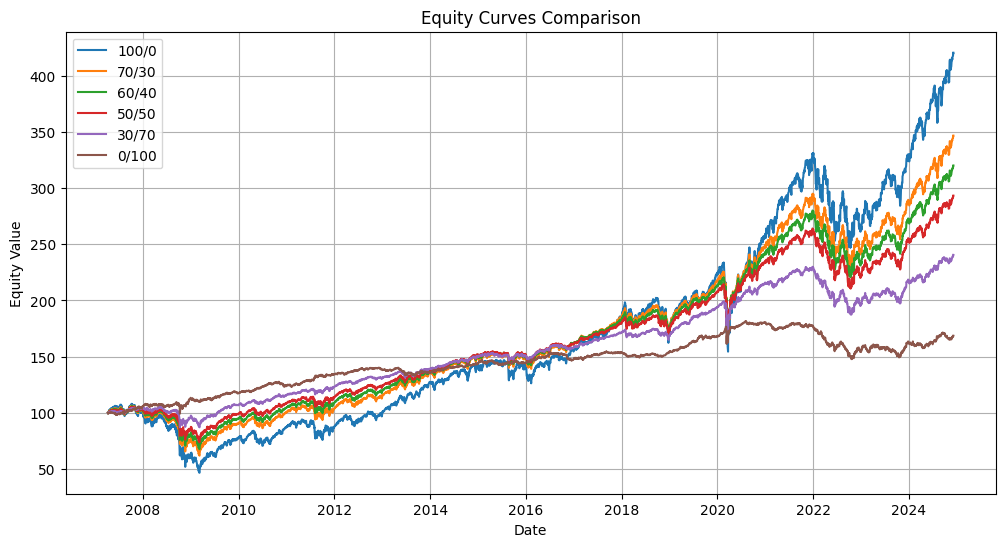

In [12]:
plt.figure(figsize=(12, 6))

plt.plot(results_dfs['100_0_0_0_0'].index, results_dfs['100_0_0_0_0']['equity_curve'], label='100/0')
plt.plot(results_dfs['70_30_0_0_0'].index, results_dfs['70_30_0_0_0']['equity_curve'], label='70/30')
plt.plot(results_dfs['60_40_0_0_0'].index, results_dfs['60_40_0_0_0']['equity_curve'], label='60/40')
plt.plot(results_dfs['50_50_0_0_0'].index, results_dfs['50_50_0_0_0']['equity_curve'], label='50/50')
plt.plot(results_dfs['30_70_0_0_0'].index, results_dfs['30_70_0_0_0']['equity_curve'], label='30/70')
plt.plot(results_dfs['0_100_0_0_0'].index, results_dfs['0_100_0_0_0']['equity_curve'], label='0/100')

plt.title('Equity Curves Comparison')
plt.xlabel('Date')
plt.ylabel('Equity Value')
plt.legend()
plt.grid(True)
plt.show()

C:\Users\phitz\AppData\Local\Temp\ipykernel_15000\2617877793.py:20: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[0].boxplot(stocks_grouped, labels=stocks_labels, showfliers=True)
C:\Users\phitz\AppData\Local\Temp\ipykernel_15000\2617877793.py:25: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1].boxplot(bonds_grouped, labels=bonds_labels, showfliers=True)
C:\Users\phitz\AppData\Local\Temp\ipykernel_15000\2617877793.py:29: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[2].boxplot(commodities_grouped, labels=commodities_labels, showfliers=True)
C:\Users\phitz\AppData\Local\Temp\ipykernel_15000\2617877793.p

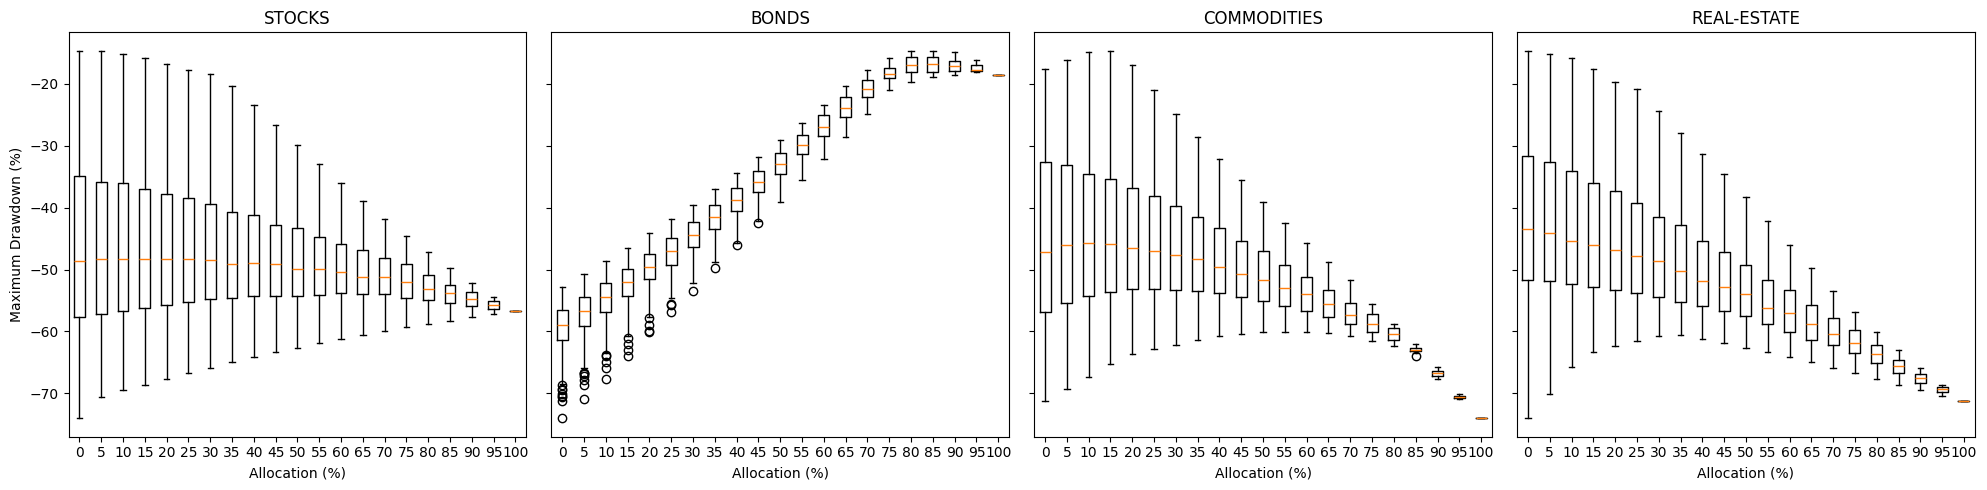

In [23]:
# Filter data for MMF == 0
data = results[results['MMF'] == 0]

# Prepare grouped data for each asset class
stocks_grouped = [group['max_drawdown'] for _, group in data.groupby('STOCKS')]
bonds_grouped = [group['max_drawdown'] for _, group in data.groupby('BONDS')]
commodities_grouped = [group['max_drawdown'] for _, group in data.groupby('COMMODITIES')]
real_estate_grouped = [group['max_drawdown'] for _, group in data.groupby('REAL-ESTATE')]

# Get unique allocation percentages for x-axis labels
stocks_labels = sorted(data['STOCKS'].unique())
bonds_labels = sorted(data['BONDS'].unique())
commodities_labels = sorted(data['COMMODITIES'].unique())
real_estate_labels = sorted(data['REAL-ESTATE'].unique())

# Create subplots in a single row
fig, axes = plt.subplots(1, 4, figsize=(20, 5), sharey=True)

# Plot box plots for each asset class
axes[0].boxplot(stocks_grouped, labels=stocks_labels, showfliers=True)
axes[0].set_title('STOCKS')
axes[0].set_xlabel('Allocation (%)')
axes[0].set_ylabel('Maximum Drawdown (%)')

axes[1].boxplot(bonds_grouped, labels=bonds_labels, showfliers=True)
axes[1].set_title('BONDS')
axes[1].set_xlabel('Allocation (%)')

axes[2].boxplot(commodities_grouped, labels=commodities_labels, showfliers=True)
axes[2].set_title('COMMODITIES')
axes[2].set_xlabel('Allocation (%)')

axes[3].boxplot(real_estate_grouped, labels=real_estate_labels, showfliers=True)
axes[3].set_title('REAL-ESTATE')
axes[3].set_xlabel('Allocation (%)')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

C:\Users\phitz\AppData\Local\Temp\ipykernel_15000\3800446024.py:20: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[0].boxplot(stocks_grouped, labels=stocks_labels, showfliers=True)
C:\Users\phitz\AppData\Local\Temp\ipykernel_15000\3800446024.py:25: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1].boxplot(bonds_grouped, labels=bonds_labels, showfliers=True)
C:\Users\phitz\AppData\Local\Temp\ipykernel_15000\3800446024.py:29: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[2].boxplot(commodities_grouped, labels=commodities_labels, showfliers=True)
C:\Users\phitz\AppData\Local\Temp\ipykernel_15000\3800446024.p

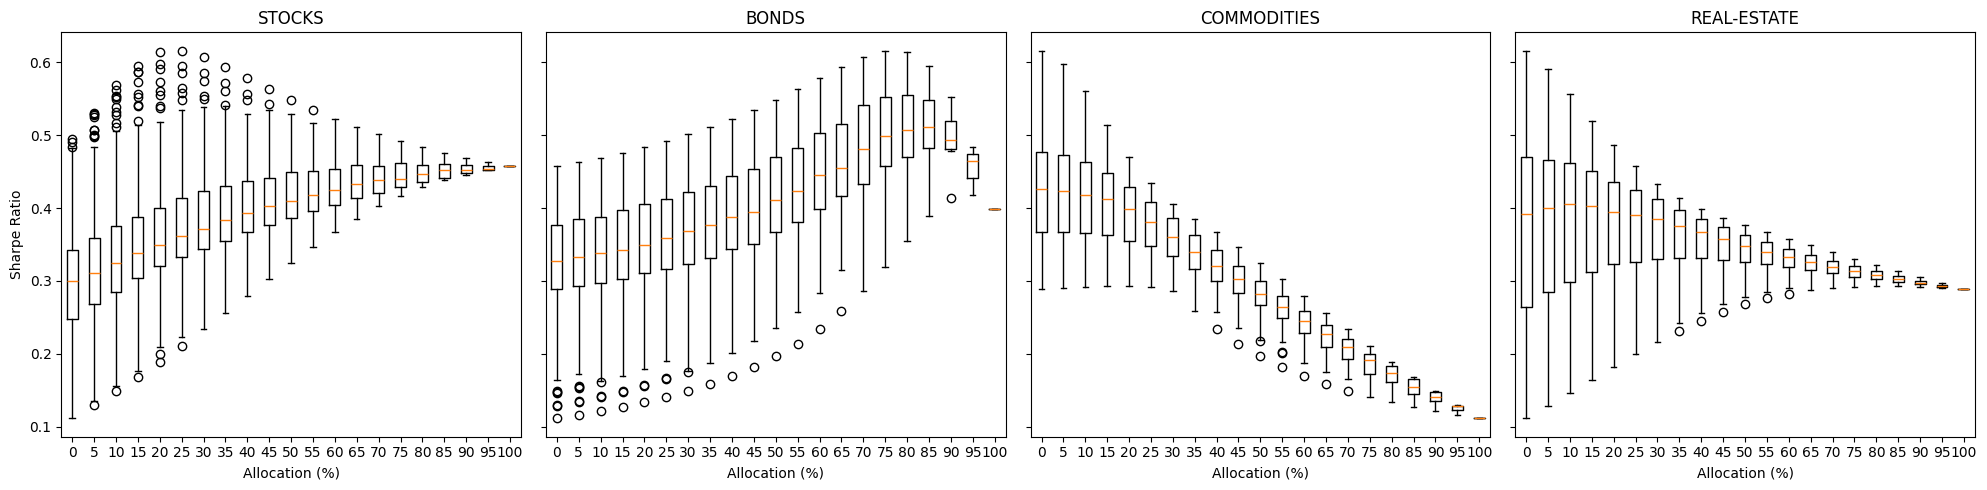

In [24]:
# Filter data for MMF == 0
data = results[results['MMF'] == 0]

# Prepare grouped data for each asset class
stocks_grouped = [group['sharpe_ratio'] for _, group in data.groupby('STOCKS')]
bonds_grouped = [group['sharpe_ratio'] for _, group in data.groupby('BONDS')]
commodities_grouped = [group['sharpe_ratio'] for _, group in data.groupby('COMMODITIES')]
real_estate_grouped = [group['sharpe_ratio'] for _, group in data.groupby('REAL-ESTATE')]

# Get unique allocation percentages for x-axis labels
stocks_labels = sorted(data['STOCKS'].unique())
bonds_labels = sorted(data['BONDS'].unique())
commodities_labels = sorted(data['COMMODITIES'].unique())
real_estate_labels = sorted(data['REAL-ESTATE'].unique())

# Create subplots in a single row
fig, axes = plt.subplots(1, 4, figsize=(20, 5), sharey=True)

# Plot box plots for each asset class
axes[0].boxplot(stocks_grouped, labels=stocks_labels, showfliers=True)
axes[0].set_title('STOCKS')
axes[0].set_xlabel('Allocation (%)')
axes[0].set_ylabel('Sharpe Ratio')

axes[1].boxplot(bonds_grouped, labels=bonds_labels, showfliers=True)
axes[1].set_title('BONDS')
axes[1].set_xlabel('Allocation (%)')

axes[2].boxplot(commodities_grouped, labels=commodities_labels, showfliers=True)
axes[2].set_title('COMMODITIES')
axes[2].set_xlabel('Allocation (%)')

axes[3].boxplot(real_estate_grouped, labels=real_estate_labels, showfliers=True)
axes[3].set_title('REAL-ESTATE')
axes[3].set_xlabel('Allocation (%)')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

C:\Users\phitz\AppData\Local\Temp\ipykernel_15000\1630201483.py:22: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[0].boxplot(stocks_grouped, labels=stocks_labels, showfliers=True)
C:\Users\phitz\AppData\Local\Temp\ipykernel_15000\1630201483.py:27: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1].boxplot(bonds_grouped, labels=bonds_labels, showfliers=True)
C:\Users\phitz\AppData\Local\Temp\ipykernel_15000\1630201483.py:31: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[2].boxplot(commodities_grouped, labels=commodities_labels, showfliers=True)
C:\Users\phitz\AppData\Local\Temp\ipykernel_15000\1630201483.p

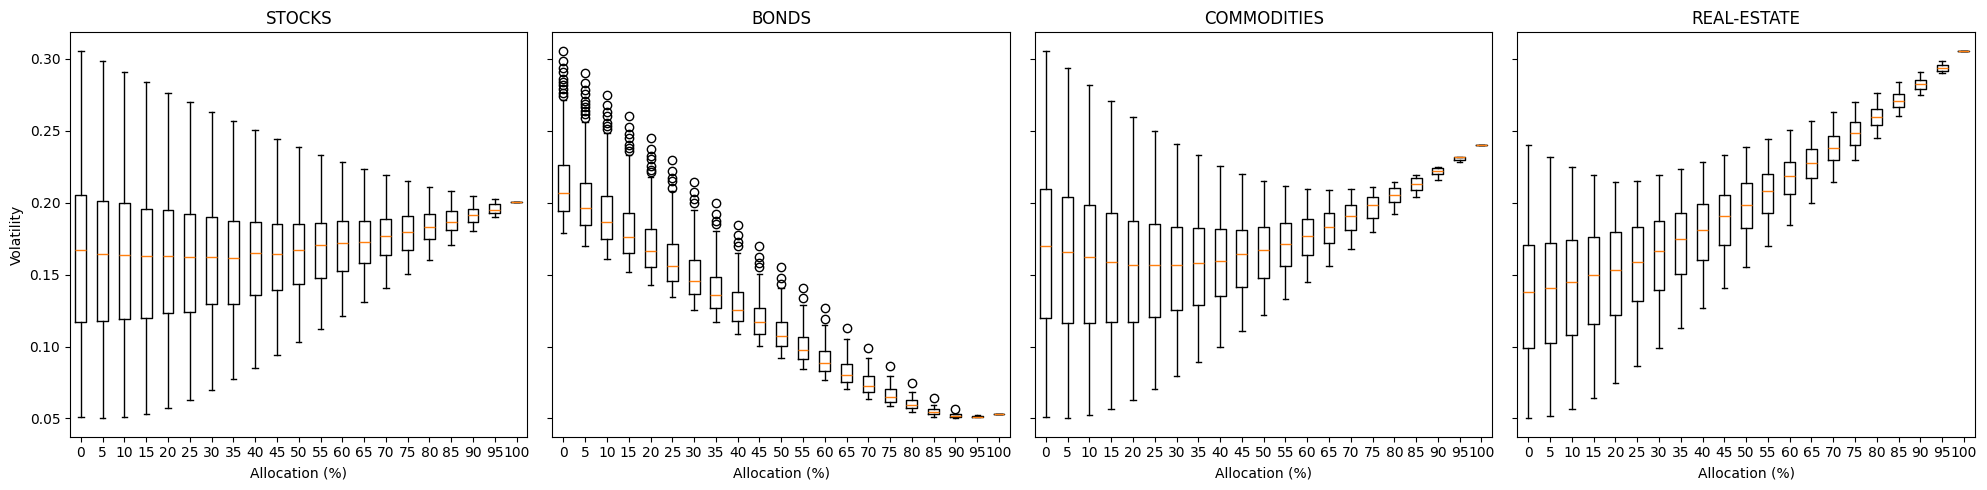

In [25]:
import matplotlib.pyplot as plt

# Filter data for MMF == 0
data = results[results['MMF'] == 0]

# Prepare grouped data for each asset class
stocks_grouped = [group['volatility'] for _, group in data.groupby('STOCKS')]
bonds_grouped = [group['volatility'] for _, group in data.groupby('BONDS')]
commodities_grouped = [group['volatility'] for _, group in data.groupby('COMMODITIES')]
real_estate_grouped = [group['volatility'] for _, group in data.groupby('REAL-ESTATE')]

# Get unique allocation percentages for x-axis labels
stocks_labels = sorted(data['STOCKS'].unique())
bonds_labels = sorted(data['BONDS'].unique())
commodities_labels = sorted(data['COMMODITIES'].unique())
real_estate_labels = sorted(data['REAL-ESTATE'].unique())

# Create subplots in a single row
fig, axes = plt.subplots(1, 4, figsize=(20, 5), sharey=True)

# Plot box plots for each asset class
axes[0].boxplot(stocks_grouped, labels=stocks_labels, showfliers=True)
axes[0].set_title('STOCKS')
axes[0].set_xlabel('Allocation (%)')
axes[0].set_ylabel('Volatility')

axes[1].boxplot(bonds_grouped, labels=bonds_labels, showfliers=True)
axes[1].set_title('BONDS')
axes[1].set_xlabel('Allocation (%)')

axes[2].boxplot(commodities_grouped, labels=commodities_labels, showfliers=True)
axes[2].set_title('COMMODITIES')
axes[2].set_xlabel('Allocation (%)')

axes[3].boxplot(real_estate_grouped, labels=real_estate_labels, showfliers=True)
axes[3].set_title('REAL-ESTATE')
axes[3].set_xlabel('Allocation (%)')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


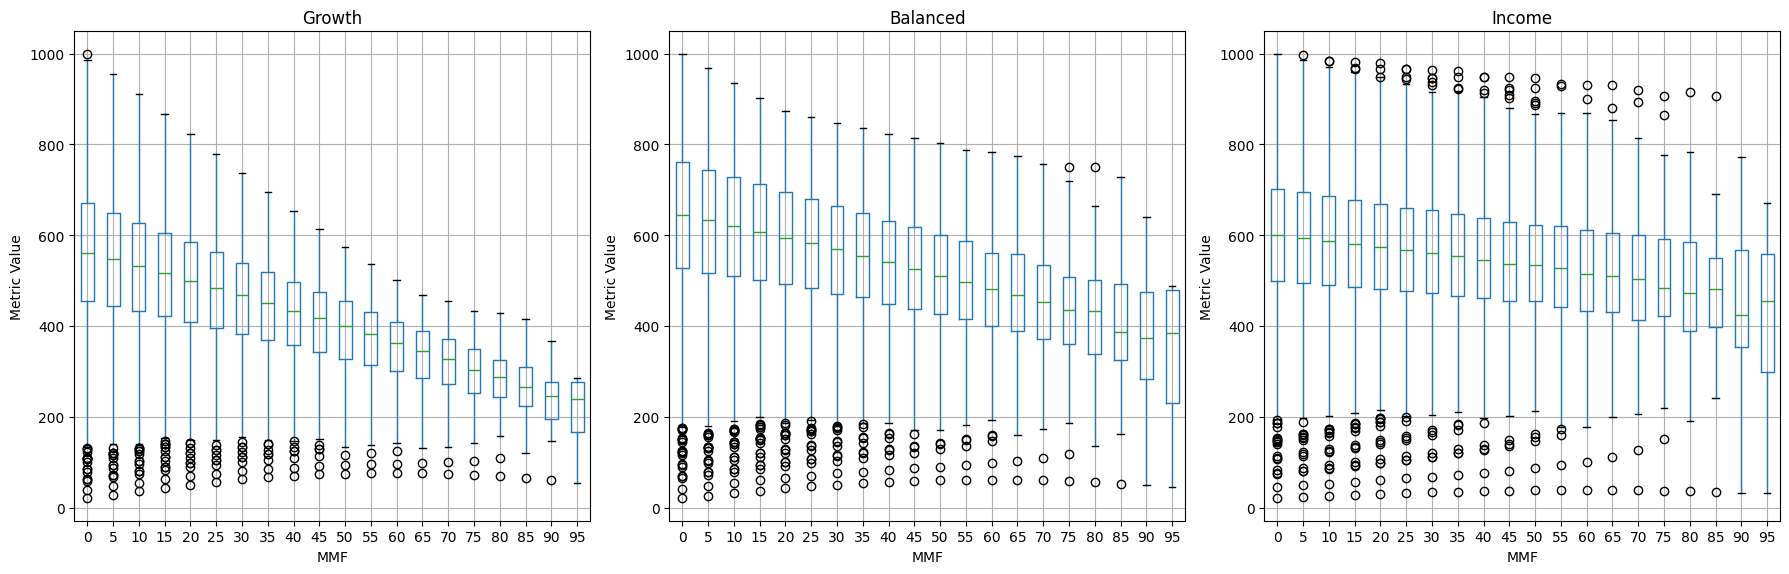

In [17]:
import warnings
warnings.simplefilter(action='ignore', category=pd.errors.SettingWithCopyWarning)

# ['STOCKS', 'BONDS', 'COMMODITIES', 'REAL-ESTATE', 'MMF']
asset_to_plot = 'MMF'


filtered_results = results.copy()

columns_to_scale = ['total_metric_growth', 'total_metric_balanced', 'total_metric_income']

def scale_sizes(sizes, min_size=20, max_size=1000):
    return ((sizes - np.min(sizes)) / (np.max(sizes) - np.min(sizes))) * (max_size - min_size) + min_size

# Use .loc to ensure proper indexing and avoid SettingWithCopyWarning
for column in columns_to_scale:
    filtered_results[column + '_scaled'] = scale_sizes(filtered_results[column])

# Metrics to plot
metrics = ['total_metric_growth_scaled', 'total_metric_balanced_scaled', 'total_metric_income_scaled']
filtered_data = filtered_results[[asset_to_plot] + metrics]

# Plotting
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))



# Create a box plot for each metric with STOCKS as the x-axis
for ax, metric, title in zip(axes,
                              ['total_metric_growth_scaled', 'total_metric_balanced_scaled', 'total_metric_income_scaled'],
                              ['Growth', 'Balanced', 'Income']):
    filtered_data.boxplot(column=metric, by=asset_to_plot, ax=ax)
    ax.set_title(title)
    ax.set_xlabel(asset_to_plot)
    ax.set_ylabel('Metric Value')

plt.suptitle('')  # Remove automatic subtitle from Pandas
plt.tight_layout()
plt.show()